# Implement Perceptron using Python

## Aim: To implement perceptron to classify the given data using basic python.

## Dataset: Numeric dataset with 2 classes.

In [ ]:
# Importing required libraries
import pandas as pd
import random
import numpy as np
import math
from statistics import mean,median
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
d=np.array([[1,0,1526,0],
        [0,1,1487,1],
        [0,0,1987,0],
        [1,1,6543,1],
        [1,0,7654,1],
        [0,0,7864,1],
        [1,1,2354,0],
        [0,1,8765,0],
        [1,0,2345,0],
        [1,0,6523,1]])

In [ ]:
len(d[0])

4

In [ ]:
class Perceptron:

  def __init__(self,lr,iter,data):
    self.lr=lr
    self.iter=iter
    self.data=data
    self.bias=1
    self.x=len(self.data) # 10
    self.w=len(self.data[0]) # 4
    self.input=[]
    for i in range(self.x):
      self.input.append(self.data[i,0:(self.w)-1])
    #print(self.input)
    self.target=[]
    for i in range(self.x):
      self.target.append(self.data[i,(self.w)-1])
    #print(self.target)

    # Initializing weights
  def weights(self):
    weights=[]
    for i in range(self.w):
      w1=round(random.uniform(0,0.5),2)
      weights.append(w1)
    bw=weights[0]
    return weights,bw

  # Net input
  def net_input(self,weights,bw):
    n=[]
    b1=np.dot(self.bias,bw)
    for i in range(self.x):
      p=np.sum(np.dot(self.input[i],weights[1:4]))
      n.append(round((p+b1),2))
    #print("The net input is",n)
    l=np.min(n)
    u=np.max(n)
    threshold=round(random.uniform(l,u),2)
    #print(f"The threshold is {threshold}")
    return n,threshold

  def act_func(self,net,threshold):
    act=[]
    for i in range(len(net)):
      if net[i]>threshold:
          act.append(1)
      else:
          act.append(0)
    #print("The predicted output",act)
    return act

  def error(self,act):
    error=[]
    j=0
    for i in self.target:
      if j>len(act)-1:
        break
      elif act[j]==i:
        continue
      else:
        e=act[j]-i
        error.append(e)
      j+=1
    return error

  def adjd_error(self,error):
    adj_error=error[0]*self.lr
    #print(f"Adjusted Error {adj_error}")
    return adj_error

  def update_weights(self,adj_error,weights):
    # Change in weights
    c=[]
    for i in weights:
      c_i=np.dot(i,adj_error)
      c.append(c_i)
    #print("The change in weights",c)
    # Update weights
    Upd_weights=[]
    for i in range(4):
      W=round(c[i]+weights[i],2)
      Upd_weights.append(W)
      ubw=Upd_weights[0]
    #print(f"The updated weights are {Upd_weights}")
    return Upd_weights,ubw

  def fit(self):
    accuracy=[]
    for i in range(self.iter):
      w,b=self.weights()
      n,t=self.net_input(w,b)
      a=self.act_func(n,t)
      e=self.error(a)
      ae=self.adjd_error(e)
      uw,buw=self.update_weights(ae,w)
      un,ut=self.net_input(uw,buw)
      ua=self.act_func(un,ut)
      acc=accuracy_score(self.target,ua)
      accuracy.append(acc)
    #print(accuracy)
    return accuracy

In [ ]:
p=Perceptron(0.02,20,d)
y=p.fit()

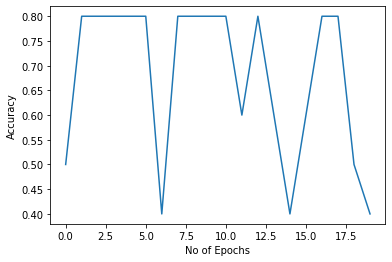

In [ ]:
x=range(0,20)
plt.plot(x,y)
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.show()

## Conclusion: From the graph we can observe that the there is a lot of variation in the accuracy, thus we need to optimize the network better.